In [1]:
library(rpart)
str(kyphosis)

Warning message:
"package 'rpart' was built under R version 3.6.3"

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


n= 81 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 81 17 absent (0.79012346 0.20987654)  
   2) Start>=8.5 62  6 absent (0.90322581 0.09677419)  
     4) Start>=14.5 29  0 absent (1.00000000 0.00000000) *
     5) Start< 14.5 33  6 absent (0.81818182 0.18181818)  
      10) Age< 55 12  0 absent (1.00000000 0.00000000) *
      11) Age>=55 21  6 absent (0.71428571 0.28571429)  
        22) Age>=111 14  2 absent (0.85714286 0.14285714) *
        23) Age< 111 7  3 present (0.42857143 0.57142857) *
   3) Start< 8.5 19  8 present (0.42105263 0.57894737) *

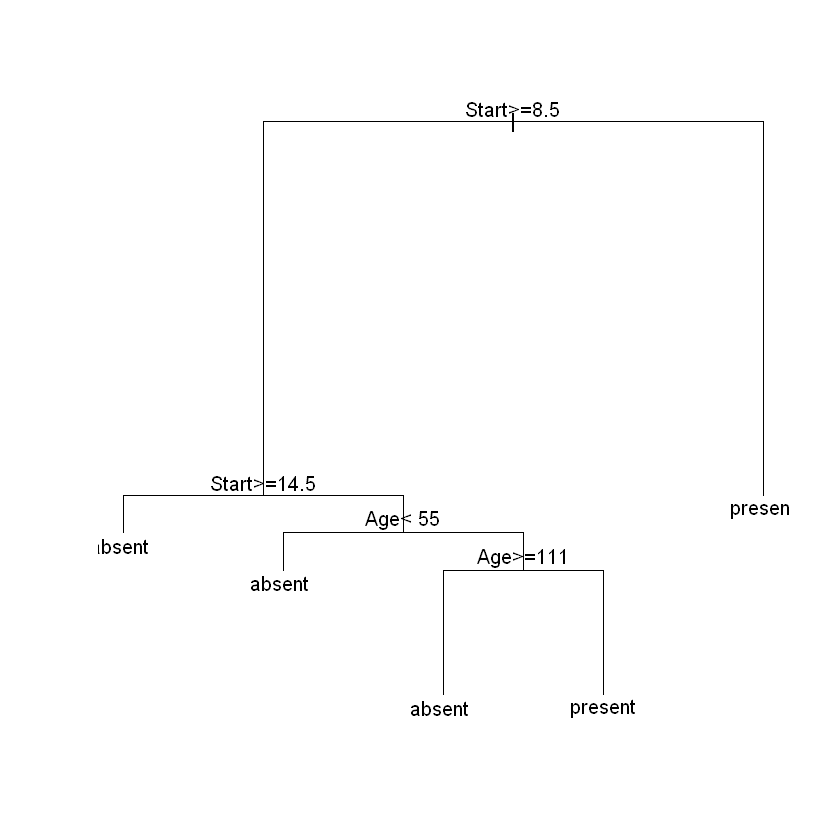

In [2]:
kyphosis.tr = rpart(Kyphosis ~ ., kyphosis)
kyphosis.tr
plot(kyphosis.tr) #나무 모형
text(kyphosis.tr) #어떻게 분리되어 나무모형이 형성되었는지 설명

n= 81 

node), split, n, loss, yval, (yprob)
      * denotes terminal node
-absent일 경우 absent가 주요 요소임을 의미
-terminal node는 *로 표시됨*
 1) root 81 17 absent (0.79012346 0.20987654)  
   2) Start>=8.5 62  6 absent (0.90322581 0.09677419)  
     4) Start>=14.5 29  0 absent (1.00000000 0.00000000) *
     5) Start< 14.5 33  6 absent (0.81818182 0.18181818)  
      10) Age< 55 12  0 absent (1.00000000 0.00000000) *
      11) Age>=55 21  6 absent (0.71428571 0.28571429)  
        22) Age>=111 14  2 absent (0.85714286 0.14285714) *
        23) Age< 111 7  3 present (0.42857143 0.57142857) *
   3) Start< 8.5 19  8 present (0.42105263 0.57894737) *

- Heap과 같이 분리됨
- 폭이 짧을수록 split이 더 잘 이루어지지 않았음을 의미

In [5]:
class(kyphosis.tr)
summary(kyphosis.tr)

[1] "rpart"

Call:
rpart(formula = Kyphosis ~ ., data = kyphosis)
  n= 81 

          CP nsplit rel error   xerror      xstd
1 0.17647059      0 1.0000000 1.000000 0.2155872
2 0.01960784      1 0.8235294 1.117647 0.2243268
3 0.01000000      4 0.7647059 1.117647 0.2243268

Variable importance
 Start    Age Number 
    64     24     12 

Node number 1: 81 observations,    complexity param=0.1764706
  predicted class=absent   expected loss=0.2098765  P(node) =1
    class counts:    64    17
   probabilities: 0.790 0.210 
  left son=2 (62 obs) right son=3 (19 obs)
  Primary splits:
      Start  < 8.5  to the right, improve=6.762330, (0 missing)
      Number < 5.5  to the left,  improve=2.866795, (0 missing)
      Age    < 39.5 to the left,  improve=2.250212, (0 missing)
  Surrogate splits:
      Number < 6.5  to the left,  agree=0.802, adj=0.158, (0 split)

Node number 2: 62 observations,    complexity param=0.01960784
  predicted class=absent   expected loss=0.09677419  P(node) =0.7654321
    class co

cross validation: 에러를 측정하기 좋은 방법

          CP nsplit rel error   xerror      xstd
1 0.17647059      0 1.0000000 1.000000 0.2155872
2 0.01960784      1 0.8235294 1.117647 0.2243268
3 0.01000000      4 0.7647059 1.117647 0.2243268

CP >> Cost Complexity
Rel Error >> Tree가 복잡해질수록 커짐

Variable importance
 Start    Age Number 
    64     24     12 

Age가 Number보다 두 배 중요함

Node number 1: 81 observations,    complexity param=0.1764706

  predicted class=absent   expected loss=0.2098765  P(node) =1
    class counts:    64    17
   probabilities: 0.790 0.210 
  left son=2 (62 obs) right son=3 (19 obs)
  Primary splits:
      Start  < 8.5  to the right, improve=6.762330, (0 missing)
      Number < 5.5  to the left,  improve=2.866795, (0 missing)
      Age    < 39.5 to the left,  improve=2.250212, (0 missing)
  
각 변수를 어디서 split해야 impurity가 감소하는가?

Surrogate splits:
      Number < 6.5  to the left,  agree=0.802, adj=0.158, (0 split)

In [7]:
install.packages("tree")
library(tree)

Installing package into 'C:/Users/Youngju Hong/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Youngju Hong\AppData\Local\Temp\RtmpiK6D6x\downloaded_packages


Warning message:
"package 'tree' was built under R version 3.6.3"

In [8]:
ky.tree = tree(Kyphosis ~., data = kyphosis)
ky.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 81 83.230 absent ( 0.79012 0.20988 )  
   2) Start < 12.5 35 47.800 absent ( 0.57143 0.42857 )  
     4) Age < 34.5 10  6.502 absent ( 0.90000 0.10000 )  
       8) Age < 16 5  5.004 absent ( 0.80000 0.20000 ) *
       9) Age > 16 5  0.000 absent ( 1.00000 0.00000 ) *
     5) Age > 34.5 25 34.300 present ( 0.44000 0.56000 )  
      10) Number < 4.5 12 16.300 absent ( 0.58333 0.41667 )  
        20) Age < 127.5 7  8.376 absent ( 0.71429 0.28571 ) *
        21) Age > 127.5 5  6.730 present ( 0.40000 0.60000 ) *
      11) Number > 4.5 13 16.050 present ( 0.30769 0.69231 )  
        22) Start < 8.5 8  6.028 present ( 0.12500 0.87500 ) *
        23) Start > 8.5 5  6.730 absent ( 0.60000 0.40000 ) *
   3) Start > 12.5 46 16.450 absent ( 0.95652 0.04348 )  
     6) Start < 14.5 17 12.320 absent ( 0.88235 0.11765 )  
      12) Age < 59 5  0.000 absent ( 1.00000 0.00000 ) *
      13) Age > 59 12 10.810 absent ( 0.8


Classification tree:
tree(formula = Kyphosis ~ ., data = kyphosis)
Number of terminal nodes:  10 
Residual mean deviance:  0.5809 = 41.24 / 71 
Misclassification error rate: 0.1235 = 10 / 81 

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "variable.importance"
[13] "y"                   "ordered"            

$xlevels
named list()

$ylevels
[1] "absent"  "present"

$class
[1] "rpart"

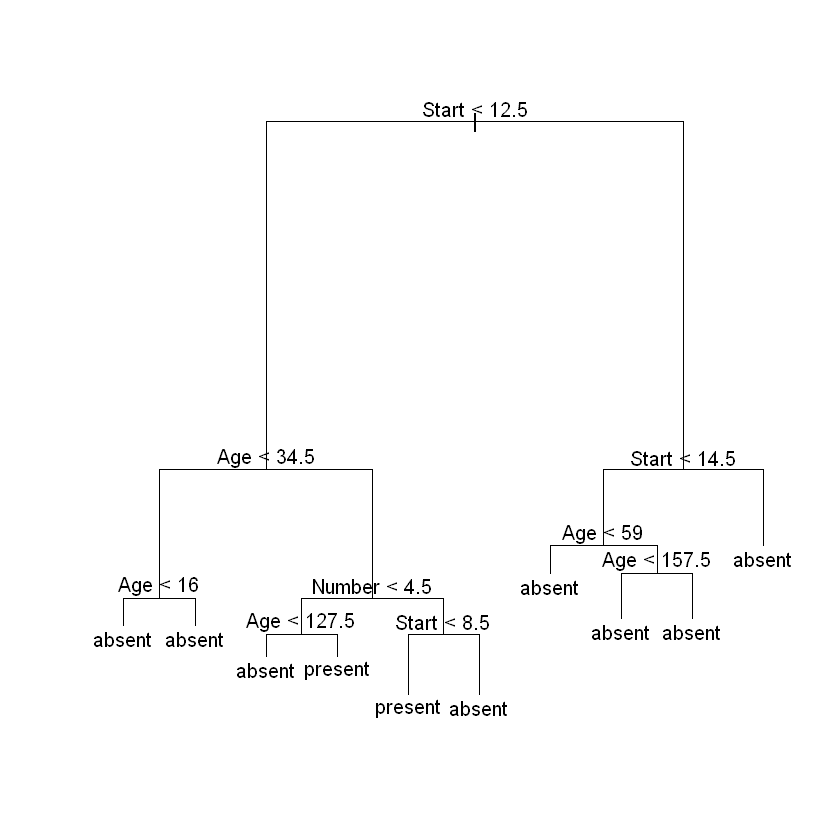

In [12]:
summary(ky.tree)

# 오래된 나무모형분석

plot(ky.tree)
text(ky.tree)
attributes(kyphosis.tr)

- 훨씬 복잡한 tree 형태.
- Pruning이 되어있지 않음.

Classification tree:
tree(formula = Kyphosis ~ ., data = kyphosis)
Number of terminal nodes:  10 
Residual mean deviance:  0.5809 = 41.24 / 71 
Misclassification error rate: 0.1235 = 10 / 81 
$names
'frame' 'where' 'call' 'terms' 'cptable' 'method' 'parms' 'control' 'functions' 'numresp' 'splits' 'variable.importance' 'y' 'ordered'
$xlevels
$ylevels
'absent' 'present'
$class
'rpart'

In [13]:
install.packages("partykit")
library(partykit)

Installing package into 'C:/Users/Youngju Hong/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'libcoin', 'inum'



package 'libcoin' successfully unpacked and MD5 sums checked
package 'inum' successfully unpacked and MD5 sums checked
package 'partykit' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Youngju Hong\AppData\Local\Temp\RtmpiK6D6x\downloaded_packages


Warning message:
"package 'partykit' was built under R version 3.6.3"Loading required package: grid
Loading required package: libcoin
Warning message:
"package 'libcoin' was built under R version 3.6.3"Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"


Model formula:
Kyphosis ~ Age + Number + Start

Fitted party:
[1] root
|   [2] Start >= 8.5
|   |   [3] Start >= 14.5: absent (n = 29, err = 0.0%)
|   |   [4] Start < 14.5
|   |   |   [5] Age < 55: absent (n = 12, err = 0.0%)
|   |   |   [6] Age >= 55
|   |   |   |   [7] Age >= 111: absent (n = 14, err = 14.3%)
|   |   |   |   [8] Age < 111: present (n = 7, err = 42.9%)
|   [9] Start < 8.5: present (n = 19, err = 42.1%)

Number of inner nodes:    4
Number of terminal nodes: 5

[1] "constparty" "party"

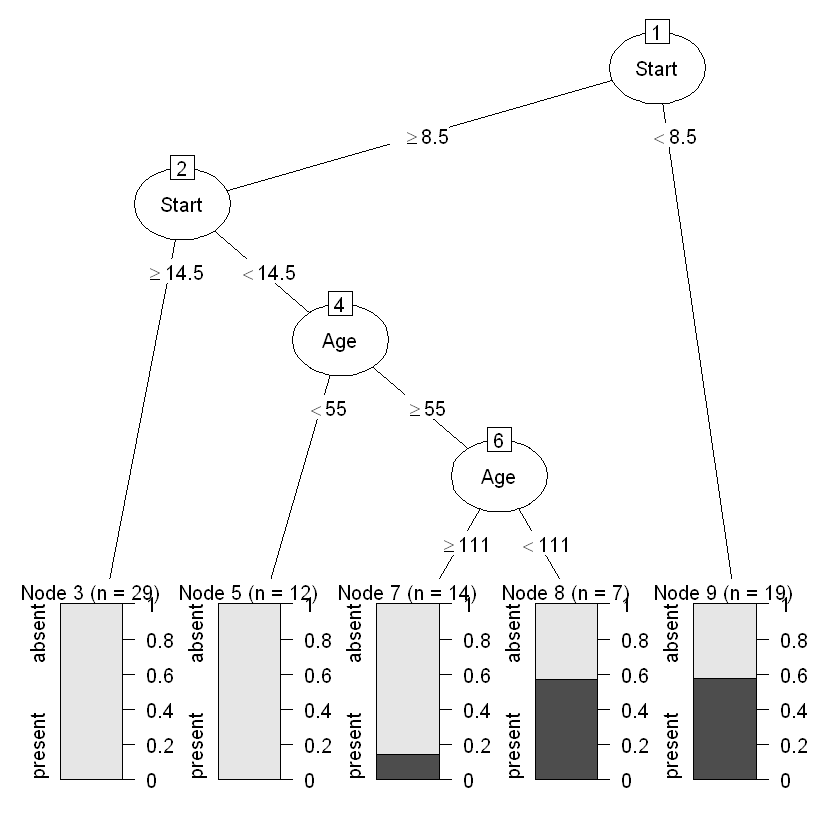

In [15]:
kyphosis.party = as.party(kyphosis.tr) #rpart에 만들어진 것을 party로 형성
kyphosis.party
plot(kyphosis.party)

In [16]:
kyphosis.tr.cv = rpart(Kyphosis ~ ., data = kyphosis, control = rpart.control(xval = 10))
printcp(kyphosis.tr.cv)


Classification tree:
rpart(formula = Kyphosis ~ ., data = kyphosis, control = rpart.control(xval = 10))

Variables actually used in tree construction:
[1] Age   Start

Root node error: 17/81 = 0.20988

n= 81 

        CP nsplit rel error xerror    xstd
1 0.176471      0   1.00000 1.0000 0.21559
2 0.019608      1   0.82353 1.1765 0.22829
3 0.010000      4   0.76471 1.1765 0.22829


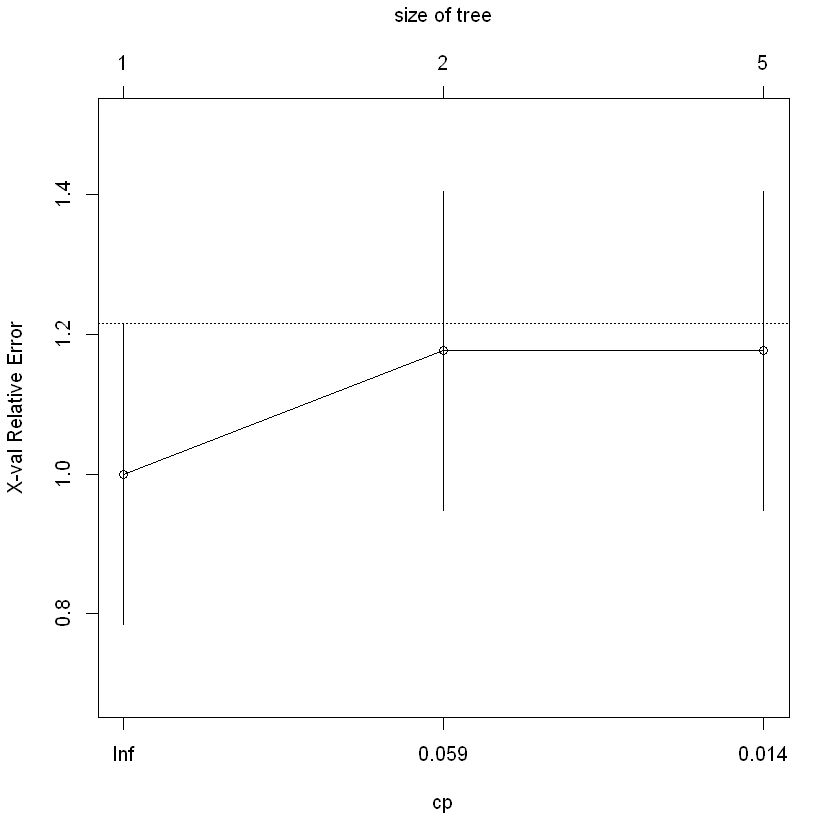

In [17]:
plotcp(kyphosis.tr.cv)

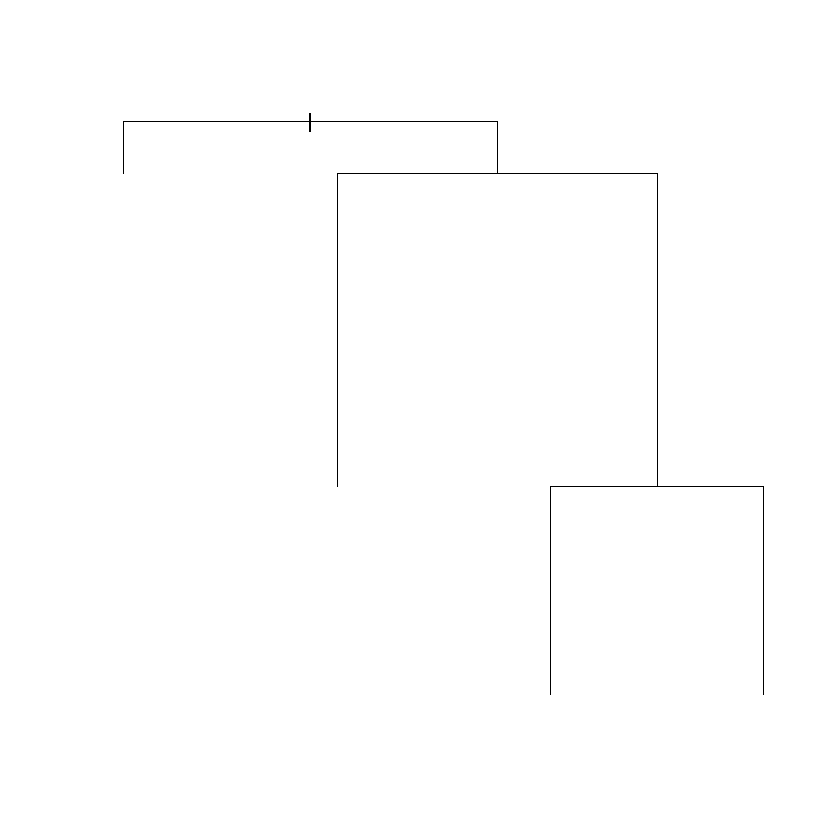

In [18]:
kyphosis.tr.info = rpart(Kyphosis ~., data = kyphosis, parm = list(split = "information")) #Gini Index
kyphosis.tr.info.party = as.party(kyphosis.tr.info)
plot(kyphosis.tr.info)